In [3]:
path = "../data/curated/"
csv_path = path + "domain_all_clean.csv"
train_path = path + "metro.csv"
import pandas as pd

# Find the nearby train station for each place
df = pd.read_csv(csv_path)
df.head()
key1 = "5b3ce3597851110001cf62487d549e1b81434af0a6e6e18e10f46745"
key2 = "5b3ce3597851110001cf6248e8eab56f0a394473af86dba1ba2cc7ef"

In [4]:
train_df = pd.read_csv(train_path)
train_df

,station,the_geom,pids,he_loop,lift
0,Alamein,POINT (145.07955800000002 -37.86884299999997),No,No,No
1,Albion,POINT (144.82470999999998 -37.77765599999998),Dot Matrix,No,No
2,Alphington,POINT (145.031251 -37.77839599999999),Dot Matrix,No,No
3,Altona,POINT (144.830604 -37.86724899999996),LCD,No,No
4,Anstey,POINT (144.96056099999998 -37.761897999999974),No,No,No
...,...,...,...,...,...
214,Williams Landing,POINT (144.74719400000004 -37.87009999999998),Dot Matrix,Yes,Yes
215,Aircraft,POINT (144.760809 -37.866603),No,No,No
216,Flemington Racecourse,POINT (144.907196 -37.787585999999976),No,No,No
217,Showgrounds,POINT (144.914982 -37.783551999999986),No,No,No


In [5]:
lon = train_df.head()["the_geom"]
lat = train_df.head()["the_geom"].str.split(" ").apply(pd.Series)[0]

In [6]:
train_df["lon"] = train_df["the_geom"].str.replace('POINT ', "").str.replace('(', "").str.replace(')', "").str.split(" ").apply(pd.Series)[0].astype(float)
train_df["lat"] = train_df["the_geom"].str.replace('POINT ', "").str.replace('(', "").str.replace(')', "").str.split(" ").apply(pd.Series)[1].astype(float)

/var/folders/z6/tzjzcr853jj4ljq6l8whqq0m0000gn/T/ipykernel_54398/1689029124.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df["lon"] = train_df["the_geom"].str.replace('POINT ', "").str.replace('(', "").str.replace(')', "").str.split(" ").apply(pd.Series)[0].astype(float)
/var/folders/z6/tzjzcr853jj4ljq6l8whqq0m0000gn/T/ipykernel_54398/1689029124.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df["lat"] = train_df["the_geom"].str.replace('POINT ', "").str.replace('(', "").str.replace(')', "").str.split(" ").apply(pd.Series)[1].astype(float)


In [7]:
df.head()
train_df.head()

,station,the_geom,pids,he_loop,lift,lon,lat
0,Alamein,POINT (145.07955800000002 -37.86884299999997),No,No,No,145.079558,-37.868843
1,Albion,POINT (144.82470999999998 -37.77765599999998),Dot Matrix,No,No,144.824710,-37.777656
2,Alphington,POINT (145.031251 -37.77839599999999),Dot Matrix,No,No,145.031251,-37.778396
3,Altona,POINT (144.830604 -37.86724899999996),LCD,No,No,144.830604,-37.867249
4,Anstey,POINT (144.96056099999998 -37.761897999999974),No,No,No,144.960561,-37.761898


In [8]:
# Call ORS API
def call_API(property_geo, train_geo, API_key):
    locations = [property_geo, train_geo]
    import requests
    import json
    print(locations)
    body = {"locations":locations, "destinations" : [0,1]}

    headers = {
        'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
        'Authorization': API_key,
        'Content-Type': 'application/json; charset=utf-8'
    }
    call = requests.post('https://api.openrouteservice.org/v2/matrix/driving-car', json=body, headers=headers)

    print(call.status_code, call.reason)
    if call.status_code != 200:
        return "Error"
    data = json.loads(call.text)["destinations"]
    print(data)
    return data

In [9]:
property_geo = [145.07955800000002, -37.86884299999997]
train_geo = [144.964584, -37.810608]
data = call_API(property_geo, train_geo, key1)

[[145.07955800000002, -37.86884299999997], [144.964584, -37.810608]]
200 OK
[{'location': [145.079779, -37.868869], 'snapped_distance': 19.6}, {'location': [144.964532, -37.810497], 'snapped_distance': 13.19}]


In [10]:
data

[{'location': [145.079779, -37.868869], 'snapped_distance': 19.6},
 {'location': [144.964532, -37.810497], 'snapped_distance': 13.19}]

In [11]:
geo_df = train_df[["lon", "lat"]]

In [12]:
geo_list = geo_df.values.tolist()

In [13]:
key1 = "5b3ce3597851110001cf62487d549e1b81434af0a6e6e18e10f46745"
key2 = "5b3ce3597851110001cf6248e8eab56f0a394473af86dba1ba2cc7ef"
def key_switch(key):
    if key == key1:
        key = key2
    else:
        key = key1
        
import time
print(property_geo)
count = 0
key = key1
for i in geo_list:
    #print(i)
    #print(count)
    "call_API(property_geo, i, key)"
    if count == 19:
        print("switch key")
        key_switch(key)
        count = 0
    else:
        count += 1

[145.07955800000002, -37.86884299999997]
switch key
switch key
switch key
switch key
switch key
switch key
switch key
switch key
switch key
switch key


In [14]:
import time
time.sleep(1)

In [18]:
num_clusters = 10

from sklearn.cluster import KMeans
import numpy as np
X = np.array(geo_list)

# Train first
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
#property_geo = [144.960102,  -37.8107635]
def find_nearest_station(property_geo):
    
    kmeans.labels_

    index = kmeans.predict([property_geo])[0]
    #print(kmeans.cluster_centers_)
    return kmeans.cluster_centers_[index]

print(find_nearest_station(property_geo))

[145.05207684 -37.87715236]


In [20]:
print(kmeans.transform([property_geo]))
print(kmeans.cluster_centers_)

[[0.44659308 0.02870992 0.21202395 0.24915621 0.1363194  0.16914371
  0.1284183  0.37032787 0.21106918 0.32348777]]
[[145.18774388 -38.30213412]
 [145.05207684 -37.87715236]
 [145.29004636 -37.84337129]
 [144.83232676 -37.83793129]
 [144.97032043 -37.78729465]
 [145.13114222 -38.02992889]
 [145.12515841 -37.74879359]
 [144.7631192  -37.6764652 ]
 [144.96932338 -37.6888471 ]
 [145.3412878  -38.0589531 ]]


In [21]:
property_geo_list = df[["longitude","latitude"]].values.tolist()
property_geo_list

nearest_station_list = []
count = 0
for i in property_geo_list:
    nearest_station = find_nearest_station(i)
    #print(i)
    #if count != -1:
        #break
    #print(nearest_station)
    count += 1
    nearest_station_list.append(i)
#print(nearest_station_list)
df["nearest_station"] = pd.Series(nearest_station_list)

In [22]:
df

,property_id,street,suburb,state,postcode,latitude,longitude,price,bedrooms,bathrooms,parking,property_type,is_rural,land_size,land_unit,is_retirement,url,price_int,nearest_station
0,13671355,104/300 Swanston Street,MELBOURNE,VIC,3000,-37.810608,144.964584,$550,2,1,0,Apartment / Unit / Flat,False,0,m²,False,https://www.domain.com.au/104-300-swanston-str...,550.0,"[144.964584, -37.8106079]"
1,14535732,708/228 A'BECKETT STREET,MELBOURNE,VIC,3000,-37.810192,144.956600,$500,2,1,0,Apartment / Unit / Flat,False,0,m²,False,https://www.domain.com.au/708-228-a-beckett-st...,500.0,"[144.9566, -37.8101921]"
2,15302782,504/350 La Trobe Street,MELBOURNE,VIC,3000,-37.810680,144.959274,$395 per week,2,1,0,Apartment / Unit / Flat,False,0,m²,False,https://www.domain.com.au/504-350-la-trobe-str...,395.0,"[144.959274, -37.81068]"
3,15841654,285 La Trobe Street,MELBOURNE,VIC,3000,-37.810734,144.960815,$65 per week,1,1,1,Apartment / Unit / Flat,False,0,m²,False,https://www.domain.com.au/285-la-trobe-street-...,65.0,"[144.960815, -37.8107338]"
4,15920687,8092Y/33 Rose Lane,MELBOURNE,VIC,3000,-37.815014,144.953873,$60 per week,1,1,1,Apartment / Unit / Flat,False,0,m²,False,https://www.domain.com.au/8092y-33-rose-lane-m...,60.0,"[144.953873, -37.8150139]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15434,15951739,64 Dixon Street,INVERLOCH,VIC,3996,-38.631370,145.717270,Contact Agent,1,1,0,House,False,0,m²,False,https://www.domain.com.au/64-dixon-street-inve...,NaN,"[145.71727, -38.63137]"
15435,16006035,16B Sandy Mount Avenue,INVERLOCH,VIC,3996,-38.634003,145.725235,$400.00 per week,2,1,1,House,False,0,m²,False,https://www.domain.com.au/16b-sandy-mount-aven...,400.0,"[145.725235, -38.6340027]"
15436,16006402,25A Veronica Street,INVERLOCH,VIC,3996,-38.642900,145.710159,430 per week,3,1,1,House,False,0,m²,False,https://www.domain.com.au/25a-veronica-street-...,430.0,"[145.710159, -38.6429]"
15437,16040296,14 Inverloch Parade,INVERLOCH,VIC,3996,-38.628715,145.735809,$420 wk,2,1,0,House,False,0,m²,False,https://www.domain.com.au/14-inverloch-parade-...,420.0,"[145.735809, -38.6287155]"


In [23]:
df.to_csv("domain_nearest_station.csv", index=False)

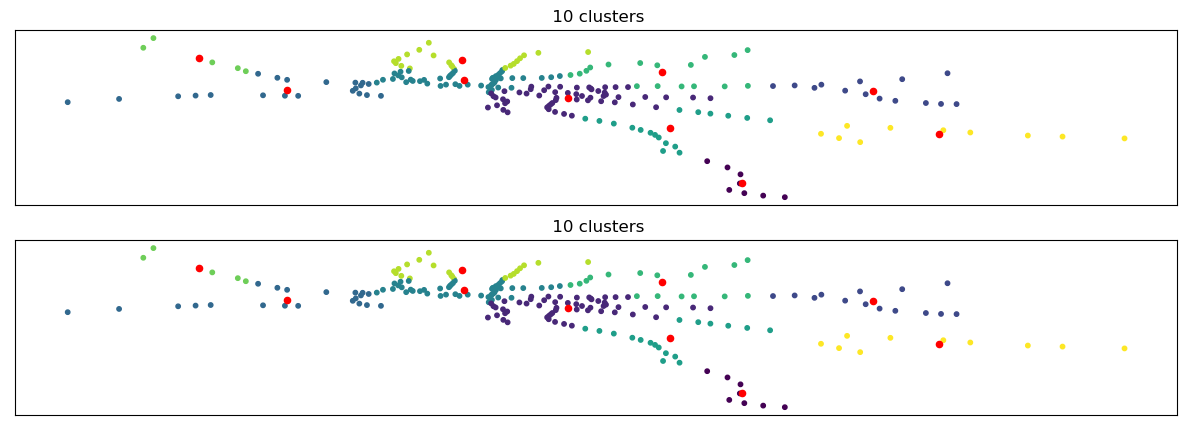

In [24]:
import matplotlib.pyplot as plt

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [10, 10]


# Make subplots for each variant
fig, axs = plt.subplots(
    len(n_clusters_list), figsize=(15, 5)
)

axs = axs.T


for j, n_clusters in enumerate(n_clusters_list):
    centers = kmeans.cluster_centers_

    axs[j].scatter(X[:, 0], X[:, 1], s=10, c=kmeans.labels_)
    axs[j].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

    axs[j].set_title(f" {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

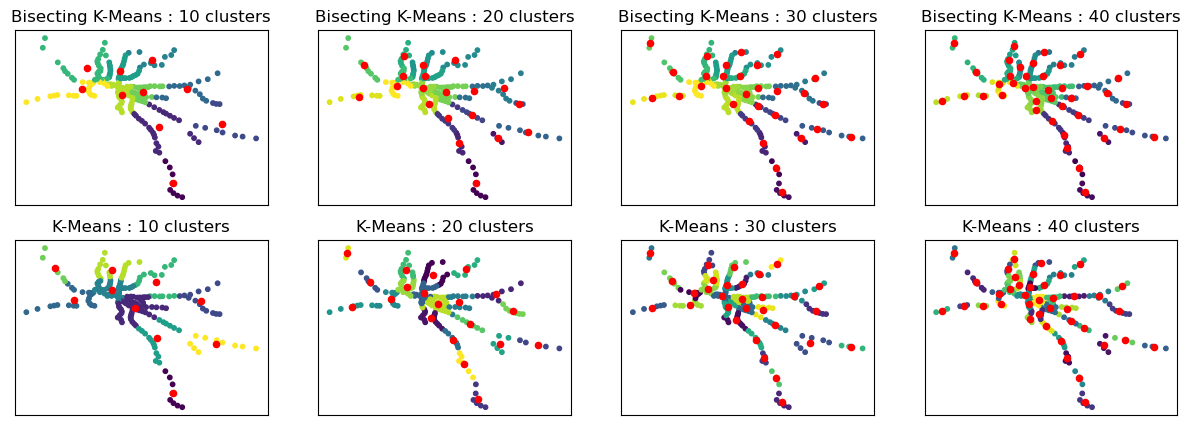

In [25]:
# Make subplots for each variant

from sklearn.cluster import BisectingKMeans, KMeans
# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [10, 20, 30, 40]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(15, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=0)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()